In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm

# Process and visualize data

## Case + death data

In [39]:
import process_data

death_df, case_df = process_data.process_case_death_data()

unique ZIPs in zip-cbsa map: 39502
unique ZIPs in zip-county map: 39490
num zips in cbsa but not county: 15
num zips in county but not cbsa: 3
rows with neg cases: 63756 out of 137850
rows with neg deaths: 44188 out of 139350


100%|██████████| 918/918 [00:02<00:00, 447.74it/s]


(array([18383., 18506., 18628., 18748., 18871., 18993., 19113., 19236.,
        19358.]),
 [Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01')])

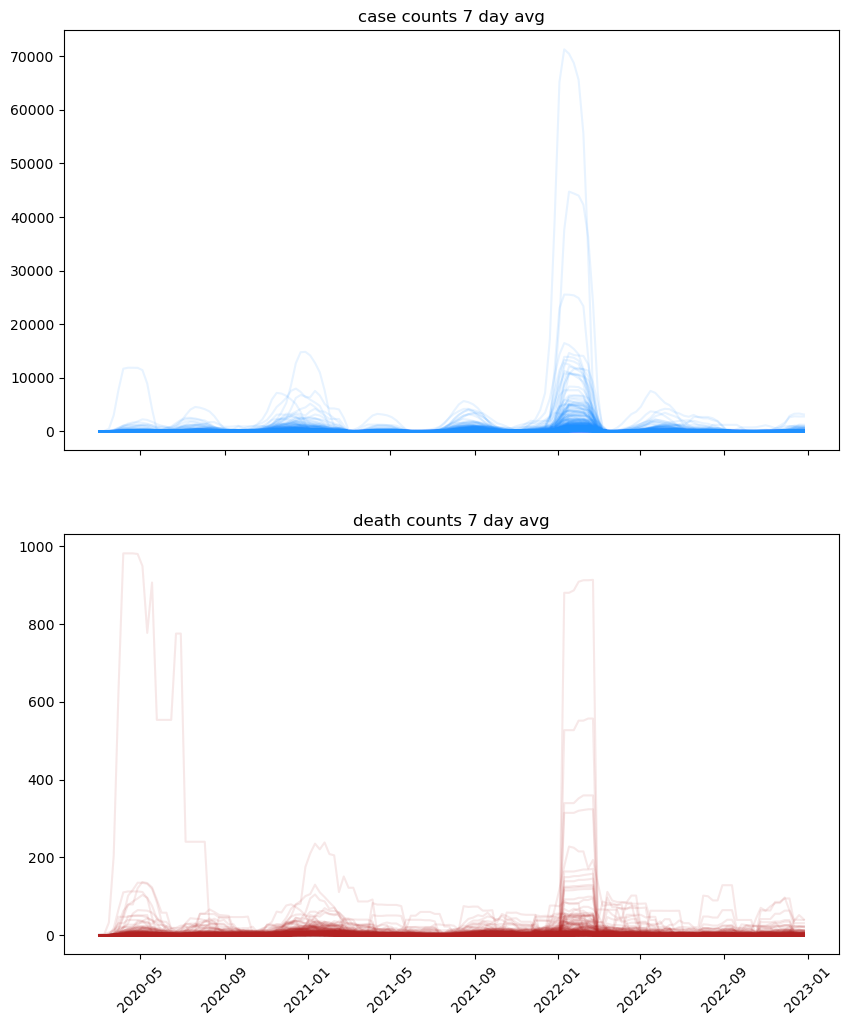

In [24]:
fig, axs = plt.subplots(2, figsize=(10,12), sharex=True)

for c in tqdm(case_subset_df['CBSA'].unique()):
    axs[0].plot(case_df.loc[case_df['CBSA'] == c, 'date'], case_df.loc[case_df['CBSA'] == c, 'CASE_COUNT_7DAY_AVG'].values, '-', label='case counts 7 day avg', alpha=0.1, color='dodgerblue')
    axs[1].plot(death_df.loc[death_df['CBSA'] == c, 'date'], death_df.loc[death_df['CBSA'] == c, 'DEATH_COUNT_7DAY_AVG'].values, '-', label='death counts 7 day avg', alpha=0.1, color='firebrick')

axs[0].set_title('case counts 7 day avg')
axs[1].set_title('death counts 7 day avg')

plt.xticks(rotation=45)

## Google mobility data

In [3]:
import process_data

mobility_report_df = process_data.process_mobility_report()
mobility_report_df.head()

/burg/apam/users/nhw2114/.conda/envs/cgnn/lib/python3.12/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /burg/apam/users/nhw2114/.conda/envs/cgnn/lib/python3.12/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/burg/apam/users/nhw2114/.conda/envs/cgnn/lib/python3.12/site-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /burg/apam/users/nhw2114/.conda/envs/cgnn/lib/python3.12/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


unique ZIPs in zip-cbsa map: 39502
unique ZIPs in zip-county map: 39490
num zips in cbsa but not county: 15
num zips in county but not cbsa: 3
imputing using columns ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
Percent of variation explained with first component: 76.10792683627832 %
[0.76107927 0.10546504 0.09323786 0.03661961 0.00359822]
Reading population data from https://www2.census.gov/programs-surveys/popest/datasets/2020-2023/counties/totals/co-est2023-alldata.csv


,date,CBSA,mobility_pc1_full_dat,mobility_pc2_full_dat,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-02,10100,15.980166,14.422821,4.000000,0.000000,NaN,3.000000,-1.0
1,2020-03-02,10140,26.318889,13.783579,13.000000,12.000000,14.0,1.000000,0.0
2,2020-03-02,10180,28.134036,9.186371,8.658451,5.858545,NaN,1.953405,NaN
3,2020-03-02,10220,33.359232,11.574745,19.000000,0.000000,NaN,4.000000,-2.0
4,2020-03-02,10300,18.882796,12.984239,7.000000,0.000000,NaN,2.000000,-1.0


## Safegraph data

In [14]:
mobility_df = process_data.get_safegraph_mobility_data()

## Process data for pytorch-geometric

In [5]:
import torch
import process_data

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("processing data on device:", device)
data = process_data.create_torch_geometric_data("gcn-usa", device)
data

processing data on device: cuda
unique ZIPs in zip-cbsa map: 39502
unique ZIPs in zip-county map: 39490
num zips in cbsa but not county: 15
num zips in county but not cbsa: 3
rows with neg cases: 63756 out of 137850
rows with neg deaths: 44188 out of 139350
unique ZIPs in zip-cbsa map: 39502
unique ZIPs in zip-county map: 39490
num zips in cbsa but not county: 15
num zips in county but not cbsa: 3
imputing using columns ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
Percent of variation explained with first component: 76.10792683627832 %
[0.76107927 0.10546504 0.09323786 0.03661961 0.00359822]
Reading population data from https://www2.census.gov/programs-surveys/popest/datasets/2020-2023/counties/totals/co-est2023-alldata.csv
creating coo_df
Creating spatial edges...


Spatial Edges: 100%|██████████| 1018684/1018684 [00:42<00:00, 24205.32it/s]


1018684 spatial edges
Creating temporal edges...
134946 temporal edges
processing safegraph data


854it [01:33,  9.14it/s]


KeyboardInterrupt: 

# Train model

##  GCN

In [11]:
from tqdm import tqdm
from model import GCN, RMSLELoss
from torch_geometric.nn import summary


graph = data.to(device)
print(graph)

model     = GCN().to(device)
print(summary(model, graph.x, graph.edge_index))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=5e-4)
criterion = RMSLELoss()

def train():
	model.train()
	optimizer.zero_grad()
	out, _ = model(graph.x.to(device), graph.edge_index.to(device))
	loss = criterion(out[graph.train_mask].squeeze(), graph.y[graph.train_mask])
	loss.backward()
	optimizer.step()
	return loss

def test():
	model.eval()
	out, _  = model(graph.x, graph.edge_index)
	loss = criterion(out[graph.test_mask].squeeze(), graph.y[graph.test_mask])

	return loss

train_loss = []
test_loss = []
for epoch in tqdm(range(1_000_000)):
	loss = train()
	train_loss.append(loss.cpu().detach().numpy())
	loss = test()
	test_loss.append(loss.cpu().detach().numpy())

print("final test loss: {}".format(test_loss[-1]))

Data(x=[460, 22], edge_index=[2, 5275], y=[460], edge_weight=[5275], train_mask=[460], test_mask=[460])
+---------------------+----------------------+--------------------+----------+
| Layer               | Input Shape          | Output Shape       | #Param   |
|---------------------+----------------------+--------------------+----------|
| GCN                 | [460, 22], [2, 5275] | [460, 1], [460, 1] | 3,937    |
| ├─(MLP_embed)Linear | [460, 22]            | [460, 32]          | 736      |
| ├─(conv1)GCNConv    | [460, 32], [2, 5275] | [460, 32]          | 1,056    |
| ├─(conv2)GCNConv    | [460, 64], [2, 5275] | [460, 32]          | 2,080    |
| ├─(MLP_pred)Linear  | [460, 64]            | [460, 1]           | 65       |
+---------------------+----------------------+--------------------+----------+


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [1:33:58<00:00, 177.35it/s]

final test loss: 0.06851895898580551


In [12]:
model.eval()
out, _  = model(graph.x, graph.edge_index)
print("train loss", criterion(out[graph.train_mask].squeeze(), graph.y[graph.train_mask]))
print("test loss", criterion(out[graph.test_mask].squeeze(), graph.y[graph.test_mask]))
print("train corr", torch.corrcoef(torch.stack((out[graph.train_mask].squeeze(), graph.y[graph.train_mask])))[0,1])
print("test corr", torch.corrcoef(torch.stack((out[graph.test_mask].squeeze(), graph.y[graph.test_mask])))[0,1])
y_test = graph.y[graph.test_mask].cpu().numpy()
out_test = out[graph.test_mask].detach().cpu().numpy()

y_train = graph.y[graph.train_mask].cpu().numpy()
out_train = out[graph.train_mask].detach().cpu().numpy()



train loss tensor(0.0586, device='cuda:0', grad_fn=<SqrtBackward0>)
test loss tensor(0.0685, device='cuda:0', grad_fn=<SqrtBackward0>)
train corr tensor(0.9985, device='cuda:0', grad_fn=<SelectBackward0>)
test corr tensor(0.9958, device='cuda:0', grad_fn=<SelectBackward0>)


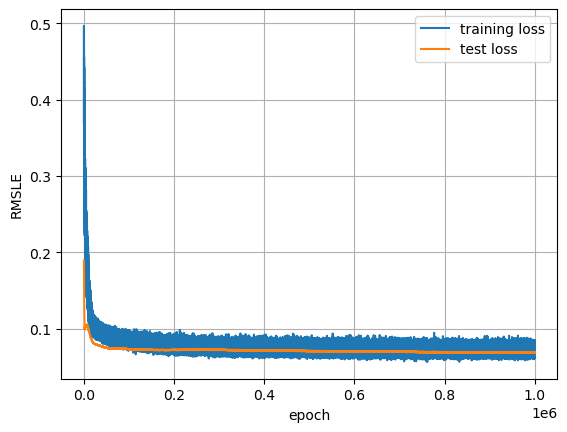

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train_loss, label='training loss')
ax.plot(test_loss, label='test loss')
ax.set_xlabel('epoch')
ax.set_ylabel('RMSLE')
ax.grid()
ax.legend()

Text(0.5, 1.0, 'Training set')

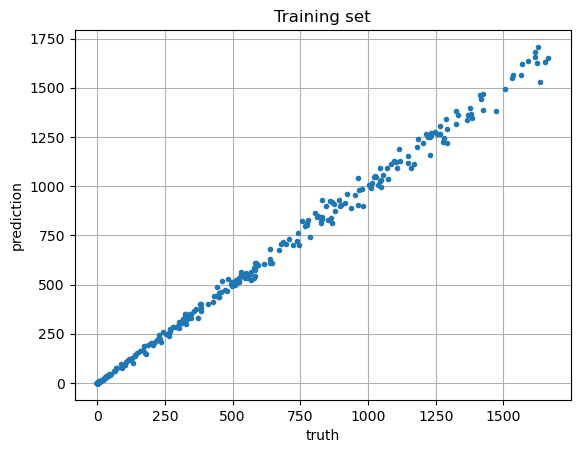

In [14]:
fig, ax = plt.subplots()
ax.plot(y_train, out_train, '.')
ax.grid()
ax.set_xlabel('truth')
ax.set_ylabel('prediction')
ax.set_title('Training set')

Text(0.5, 1.0, 'Test set')

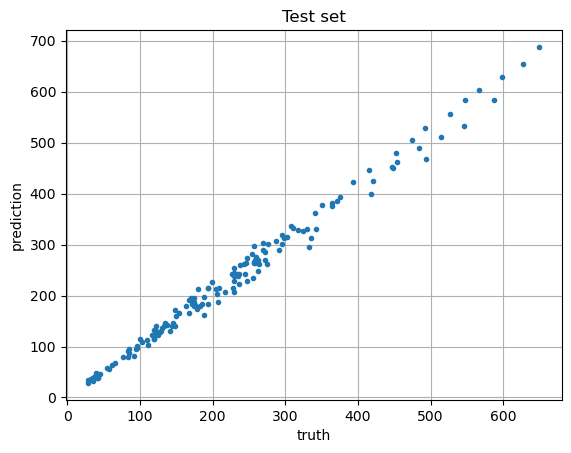

In [15]:
fig, ax = plt.subplots()
ax.plot(y_test, out_test, '.')
ax.grid()
ax.set_xlabel('truth')
ax.set_ylabel('prediction')
ax.set_title('Test set')

In [19]:
import pandas as pd
import numpy as np

node_dict = process_data.create_node_key()

pred_df = pd.DataFrame()
pred_df['key'] = np.array(list(node_dict.keys()))[np.where(np.array(graph.test_mask.cpu().numpy())==1)]
pred_df['truth'] = y_test
pred_df['pred'] = out_test

pred_df[['fips','date']] = pred_df['key'].str.split('-',n=1, expand=True)
pred_df['date'] = pd.to_datetime(pred_df['date'])

train_df = pd.DataFrame()
train_df['key'] = np.array(list(node_dict.keys()))[np.where(np.array(graph.train_mask.cpu().numpy())==1)]
train_df['truth'] = y_train
train_df['pred'] = out_train

train_df[['fips','date']] = train_df['key'].str.split('-',n=1, expand=True)
train_df['date'] = pd.to_datetime(train_df['date'])

(array([18322., 18336., 18353., 18367., 18383., 18397., 18414.]),
 [Text(18322.0, 0, '2020-03-01'),
  Text(18336.0, 0, '2020-03-15'),
  Text(18353.0, 0, '2020-04-01'),
  Text(18367.0, 0, '2020-04-15'),
  Text(18383.0, 0, '2020-05-01'),
  Text(18397.0, 0, '2020-05-15'),
  Text(18414.0, 0, '2020-06-01')])

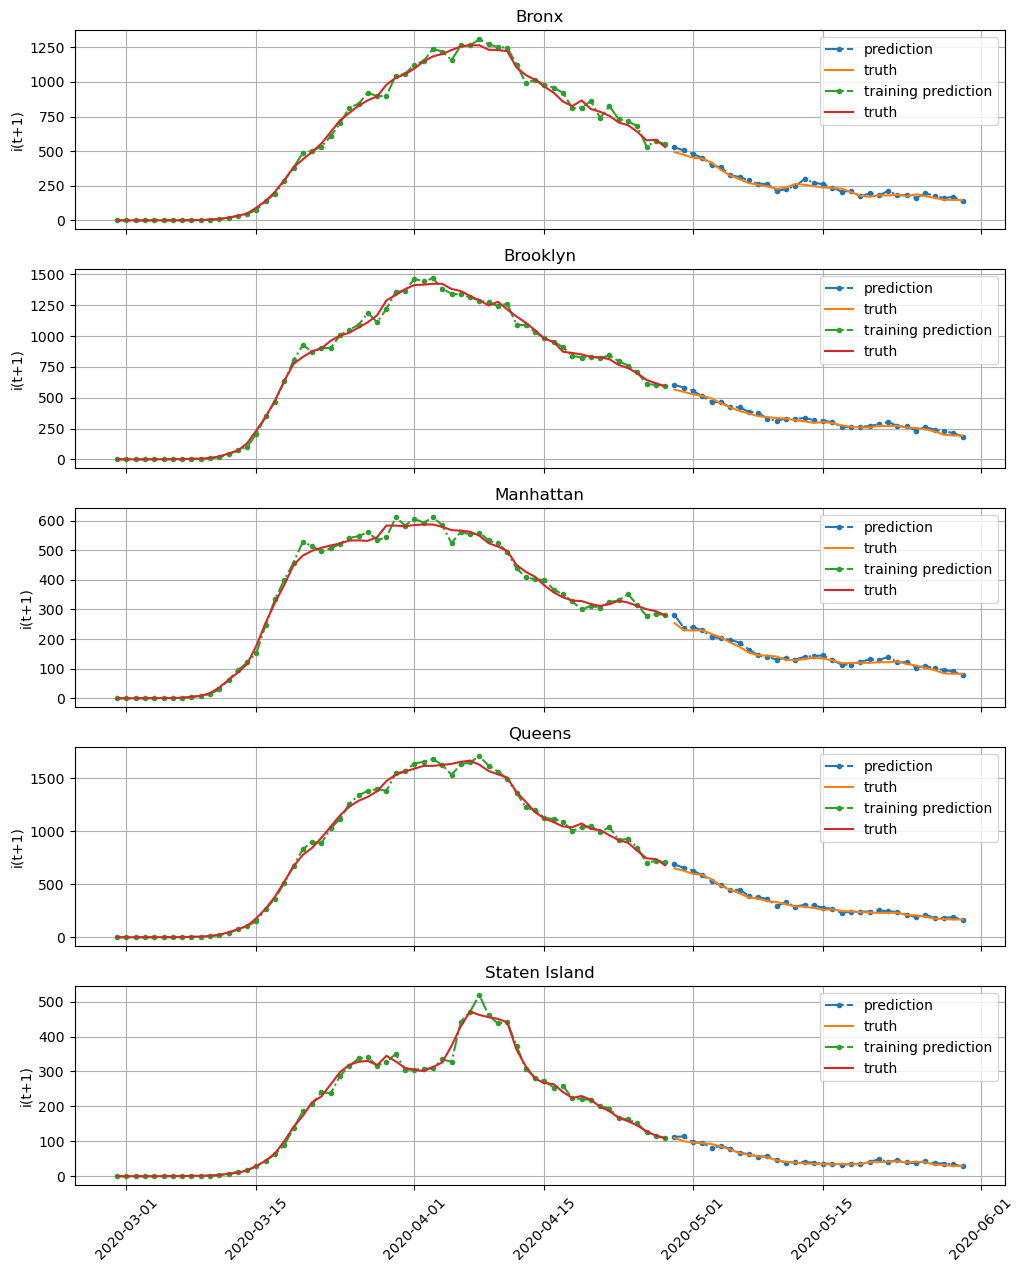

In [20]:
fig, ax = plt.subplots(5, figsize=(12,15), sharex=True)

for i, f in enumerate(fips_list):
    ax[i].plot(pred_df.loc[pred_df['fips'] == str(f), 'date'], pred_df.loc[pred_df['fips'] == str(f), 'pred'].values, '.-.', label='prediction')
    ax[i].plot(pred_df.loc[pred_df['fips'] == str(f), 'date'], pred_df.loc[pred_df['fips'] == str(f), 'truth'].values, '-', label='truth')

    ax[i].plot(train_df.loc[train_df['fips'] == str(f), 'date'], train_df.loc[train_df['fips'] == str(f), 'pred'].values, '.-.', label='training prediction')
    ax[i].plot(train_df.loc[train_df['fips'] == str(f), 'date'], train_df.loc[train_df['fips'] == str(f), 'truth'].values, '-', label='truth')
    
    ax[i].grid()
    ax[i].legend()
    ax[i].set_title(BOROUGH_FULL_FIPS_DICT[f])
    ax[i].set_ylabel(r'i(t+1)')

plt.xticks(rotation=45)


In [21]:
# predict case delta metrics

model.eval()
_, delta_pred  = model(graph.x, graph.edge_index)
print("train loss", criterion(torch.abs(delta_pred[graph.train_mask].squeeze()), torch.abs(delta_data.y[graph.train_mask])))
print("test loss", criterion(torch.abs(delta_pred[graph.test_mask].squeeze()), torch.abs(delta_data.y[graph.test_mask])))
print("train corr", torch.corrcoef(torch.stack((delta_pred[graph.train_mask].squeeze(), delta_data.y[graph.train_mask])))[0,1])
print("test corr", torch.corrcoef(torch.stack((delta_pred[graph.test_mask].squeeze(), delta_data.y[graph.test_mask])))[0,1])

train loss tensor(0.9740, device='cuda:0', grad_fn=<SqrtBackward0>)
test loss tensor(1.2066, device='cuda:0', grad_fn=<SqrtBackward0>)
train corr tensor(0.8317, device='cuda:0', grad_fn=<SelectBackward0>)
test corr tensor(0.5270, device='cuda:0', grad_fn=<SelectBackward0>)


# GCN Tuned Hyperparams

In [7]:
import pandas as pd

gcn_results = pd.read_csv("experiments/cgnn/results.csv")

gcn_results.iloc[gcn_results.test_loss.idxmin()]

dropout             0.100000
base_lr             0.010000
max_epoch       10000.000000
weight_decay        0.000500
train_loss          0.052950
test_loss           0.063949
Name: 165, dtype: float64

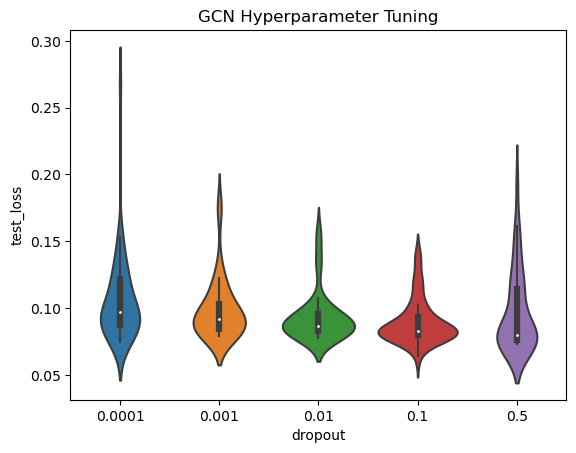

In [25]:
import seaborn as sns

dropout_plot = sns.violinplot(data=gcn_results, x="dropout", y="test_loss").set_title('GCN Hyperparameter Tuning')
dropout_plot.get_figure().savefig("../assets/dropout.png") 

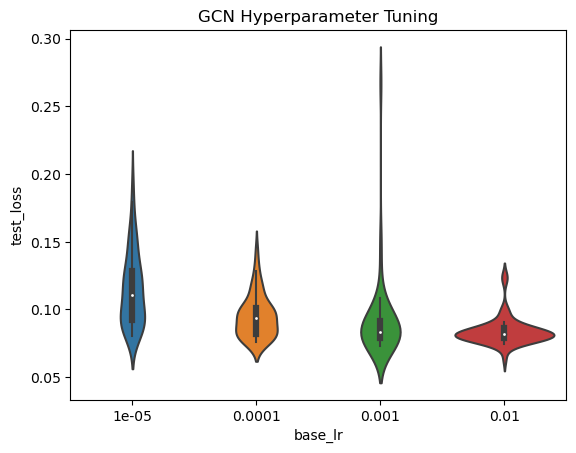

In [26]:
base_lr_plot = sns.violinplot(data=gcn_results, x="base_lr", y="test_loss").set_title('GCN Hyperparameter Tuning')
base_lr_plot.get_figure().savefig("../assets/base_lr.png") 

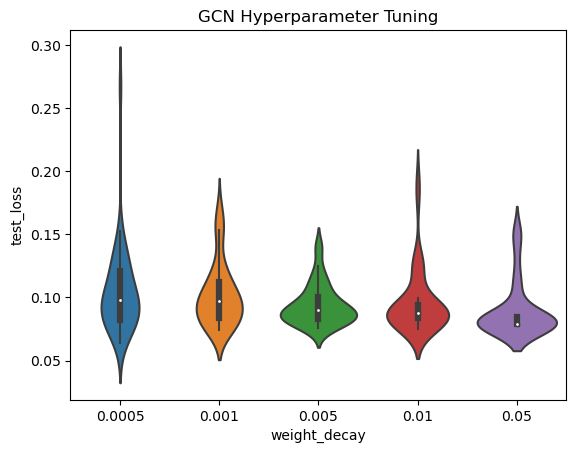

In [27]:
weight_decay_plot = sns.violinplot(data=gcn_results, x="weight_decay", y="test_loss").set_title('GCN Hyperparameter Tuning')
weight_decay_plot.get_figure().savefig("../assets/weight_decay.png") 

In [8]:
from tqdm import tqdm
from model import GCN, RMSLELoss
from torch_geometric.nn import summary

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
graph = process_data.create_torch_geometric_data("gcn", device)

model     = GCN(dropout=0.1).to(device)
print(summary(model, graph.x, graph.edge_index))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = RMSLELoss()

def train():
	model.train()
	optimizer.zero_grad()
	out, _ = model(graph.x.to(device), graph.edge_index.to(device))
	loss = criterion(out[graph.train_mask].squeeze(), graph.y[graph.train_mask])
	loss.backward()
	optimizer.step()
	return loss

def test():
	model.eval()
	out, _  = model(graph.x, graph.edge_index)
	loss = criterion(out[graph.test_mask].squeeze(), graph.y[graph.test_mask])

	return loss

train_loss = []
test_loss = []
for epoch in tqdm(range(100_000)):
	loss = train()
	train_loss.append(loss.cpu().detach().numpy())
	loss = test()
	test_loss.append(loss.cpu().detach().numpy())

print("final test loss: {}".format(test_loss[-1]))

2300 spatial edges
2975 temporal edges


5275it [00:01, 5111.05it/s]


Processed data saved to ../data/processed/gcn/
+---------------------+----------------------+--------------------+----------+
| Layer               | Input Shape          | Output Shape       | #Param   |
|---------------------+----------------------+--------------------+----------|
| GCN                 | [460, 22], [2, 5275] | [460, 1], [460, 1] | 3,937    |
| ├─(MLP_embed)Linear | [460, 22]            | [460, 32]          | 736      |
| ├─(conv1)GCNConv    | [460, 32], [2, 5275] | [460, 32]          | 1,056    |
| ├─(conv2)GCNConv    | [460, 64], [2, 5275] | [460, 32]          | 2,080    |
| ├─(MLP_pred)Linear  | [460, 64]            | [460, 1]           | 65       |
+---------------------+----------------------+--------------------+----------+


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [07:18<00:00, 227.86it/s]

final test loss: 0.05908961966633797


In [9]:
model.eval()
out, _  = model(graph.x, graph.edge_index)
print("train loss", criterion(out[graph.train_mask].squeeze(), graph.y[graph.train_mask]))
print("test loss", criterion(out[graph.test_mask].squeeze(), graph.y[graph.test_mask]))
print("train corr", torch.corrcoef(torch.stack((out[graph.train_mask].squeeze(), graph.y[graph.train_mask])))[0,1])
print("test corr", torch.corrcoef(torch.stack((out[graph.test_mask].squeeze(), graph.y[graph.test_mask])))[0,1])
y_test = graph.y[graph.test_mask].cpu().numpy()
out_test = out[graph.test_mask].detach().cpu().numpy()

y_train = graph.y[graph.train_mask].cpu().numpy()
out_train = out[graph.train_mask].detach().cpu().numpy()

train loss tensor(0.0439, grad_fn=<SqrtBackward0>)
test loss tensor(0.0591, grad_fn=<SqrtBackward0>)
train corr tensor(0.9991, grad_fn=<SelectBackward0>)
test corr tensor(0.9972, grad_fn=<SelectBackward0>)


In [10]:
# predict case delta metrics
delta_data = process_data.create_torch_geometric_data("gcn_delta", device, predict_delta=True)

model.eval()
_, delta_pred  = model(graph.x, graph.edge_index)
print("train loss", criterion(torch.abs(delta_pred[graph.train_mask].squeeze()), torch.abs(delta_data.y[graph.train_mask])))
print("test loss", criterion(torch.abs(delta_pred[graph.test_mask].squeeze()), torch.abs(delta_data.y[graph.test_mask])))
print("train corr", torch.corrcoef(torch.stack((delta_pred[graph.train_mask].squeeze(), delta_data.y[graph.train_mask])))[0,1])
print("test corr", torch.corrcoef(torch.stack((delta_pred[graph.test_mask].squeeze(), delta_data.y[graph.test_mask])))[0,1])

2300 spatial edges
2975 temporal edges


5275it [00:01, 4398.75it/s]


Processed data saved to ../data/processed/gcn_delta/
train loss tensor(0.7930, grad_fn=<SqrtBackward0>)
test loss tensor(1.0903, grad_fn=<SqrtBackward0>)
train corr tensor(0.8847, grad_fn=<SelectBackward0>)
test corr tensor(0.6370, grad_fn=<SelectBackward0>)


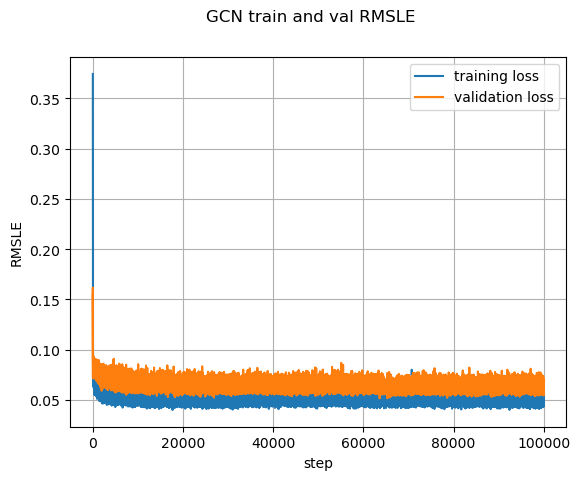

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train_loss, label='training loss')
ax.plot(test_loss, label='validation loss')
ax.set_xlabel('step')
ax.set_ylabel('RMSLE')
ax.grid()
ax.legend()

fig.suptitle("GCN train and val RMSLE")
fig.savefig("../assets/gcn_train.png")

(array([18322., 18336., 18353., 18367., 18383., 18397., 18414.]),
 [Text(18322.0, 0, '2020-03-01'),
  Text(18336.0, 0, '2020-03-15'),
  Text(18353.0, 0, '2020-04-01'),
  Text(18367.0, 0, '2020-04-15'),
  Text(18383.0, 0, '2020-05-01'),
  Text(18397.0, 0, '2020-05-15'),
  Text(18414.0, 0, '2020-06-01')])

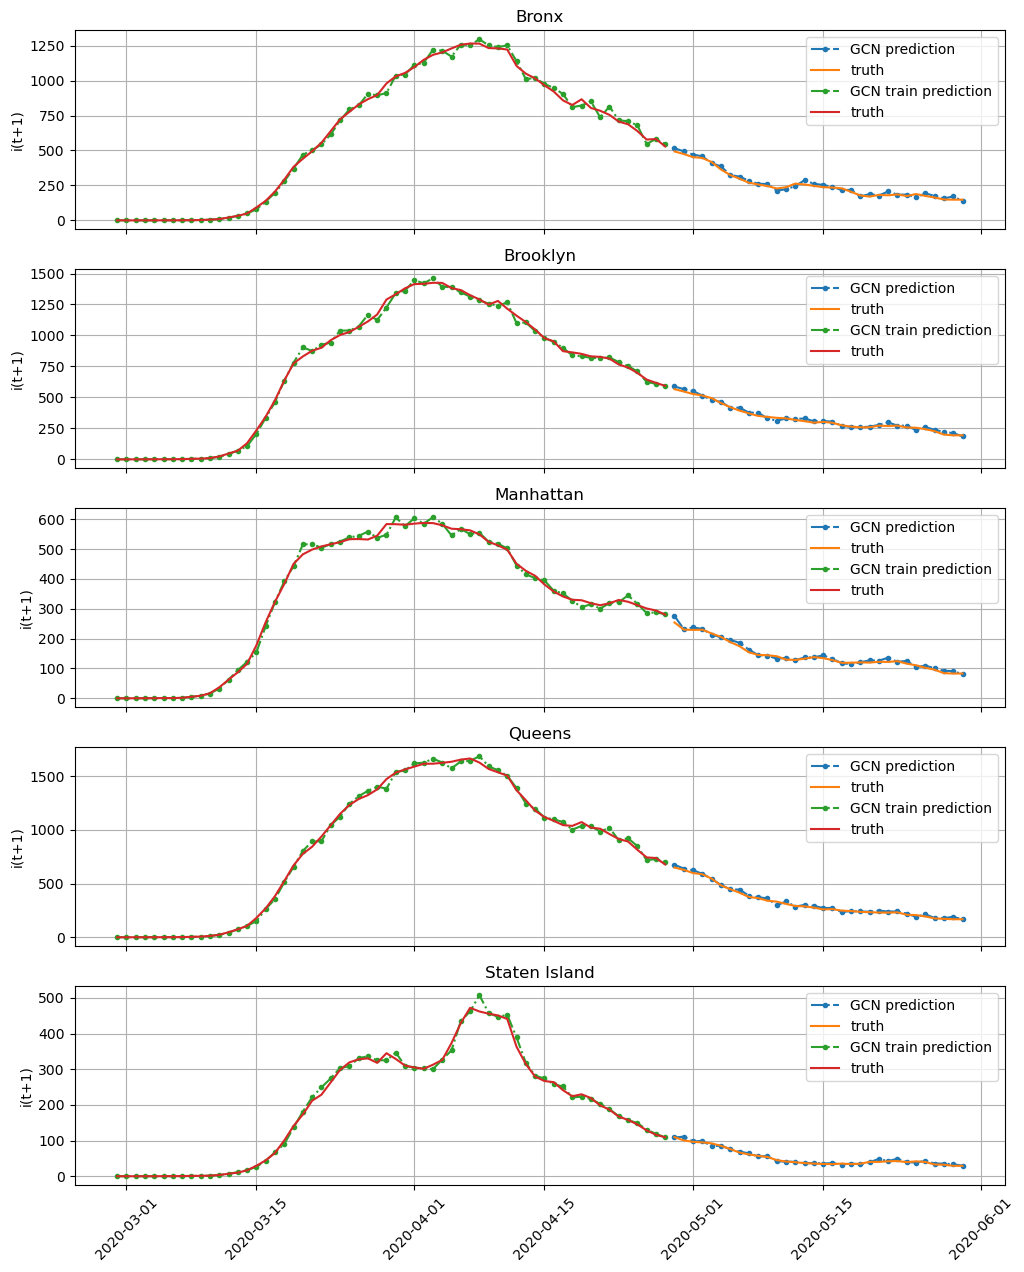

In [12]:
import pandas as pd
import numpy as np

from utils import get_fips_list
from codebook import BOROUGH_FULL_FIPS_DICT

fips_list = get_fips_list()

node_dict = process_data.create_node_key()

pred_df = pd.DataFrame()
pred_df['key'] = np.array(list(node_dict.keys()))[np.where(np.array(graph.test_mask.cpu().numpy())==1)]
pred_df['truth'] = y_test
pred_df['pred'] = out_test

pred_df[['fips','date']] = pred_df['key'].str.split('-',n=1, expand=True)
pred_df['date'] = pd.to_datetime(pred_df['date'])

train_df = pd.DataFrame()
train_df['key'] = np.array(list(node_dict.keys()))[np.where(np.array(graph.train_mask.cpu().numpy())==1)]
train_df['truth'] = y_train
train_df['pred'] = out_train

train_df[['fips','date']] = train_df['key'].str.split('-',n=1, expand=True)
train_df['date'] = pd.to_datetime(train_df['date'])


fig, ax = plt.subplots(5, figsize=(12,15), sharex=True)

for i, f in enumerate(fips_list):
    ax[i].plot(pred_df.loc[pred_df['fips'] == str(f), 'date'], pred_df.loc[pred_df['fips'] == str(f), 'pred'].values, '.-.', label='GCN prediction')
    ax[i].plot(pred_df.loc[pred_df['fips'] == str(f), 'date'], pred_df.loc[pred_df['fips'] == str(f), 'truth'].values, '-', label='truth')

    ax[i].plot(train_df.loc[train_df['fips'] == str(f), 'date'], train_df.loc[train_df['fips'] == str(f), 'pred'].values, '.-.', label='GCN train prediction')
    ax[i].plot(train_df.loc[train_df['fips'] == str(f), 'date'], train_df.loc[train_df['fips'] == str(f), 'truth'].values, '-', label='truth')
    
    ax[i].grid()
    ax[i].legend()
    ax[i].set_title(BOROUGH_FULL_FIPS_DICT[f])
    ax[i].set_ylabel(r'i(t+1)')

plt.xticks(rotation=45)
